**10 – Deep Learning**

# Setup

In [1]:
import numpy as np
import os
import tensorflow as tf

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("/tmp/data/")

X_train = mnist.train.images
X_test = mnist.test.images
y_train = mnist.train.labels.astype("int")
y_test = mnist.test.labels.astype("int")

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [3]:
reset_graph()

n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y") 

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()

n_epochs = 2
batch_size = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size, shuffle=False)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
            
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})        
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)



0 Train accuracy: 0.96 Test accuracy: 0.899
1 Train accuracy: 0.98 Test accuracy: 0.9198


# Add summary for tensorboard

In [4]:
reset_graph()

n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

from datetime import datetime                                   #-----new------#
now = datetime.utcnow().strftime("%H%M%S")                      #-----new------#

root_logdir = "./logs"                                          #-----new------#
logdir = "{}/{}_{}".format(root_logdir, "relu", now)   #-----new------#

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y") 

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()

acc_summary = tf.summary.scalar('accuracy', accuracy)                    #-----new------#
loss_summary = tf.summary.scalar('loss', loss)                            #-----new------#
merged = tf.summary.merge_all()                                            #-----new------#

train_writer = tf.summary.FileWriter(logdir + '/train', tf.get_default_graph())        #-----new------#
test_writer = tf.summary.FileWriter(logdir + '/test')                        #-----new------#
 
n_epochs = 10
batch_size = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size, shuffle=False)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
            
        acc_train, summary_train = sess.run([accuracy, merged], feed_dict={X: X_batch, y: y_batch})    #-----new------# 
        acc_test, summary_test = sess.run([accuracy, merged], feed_dict={X: X_test, y: y_test})     #-----new------#
        train_writer.add_summary(summary_train, epoch)       #-----new------#
        test_writer.add_summary(summary_test, epoch)         #-----new------#
        
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)



0 Train accuracy: 0.96 Test accuracy: 0.899
1 Train accuracy: 0.98 Test accuracy: 0.9198
2 Train accuracy: 0.98 Test accuracy: 0.928
3 Train accuracy: 1.0 Test accuracy: 0.9358
4 Train accuracy: 1.0 Test accuracy: 0.9422
5 Train accuracy: 1.0 Test accuracy: 0.9466
6 Train accuracy: 1.0 Test accuracy: 0.9504
7 Train accuracy: 1.0 Test accuracy: 0.9538
8 Train accuracy: 1.0 Test accuracy: 0.957
9 Train accuracy: 1.0 Test accuracy: 0.9594


# Standard Scaler

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
reset_graph()

n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

from datetime import datetime                                   #-----new------#
now = datetime.utcnow().strftime("%H%M%S")                      #-----new------#

root_logdir = "./logs"                                          #-----new------#
logdir = "{}/{}_{}_{}".format(root_logdir, "relu", "std", now)   #-----new------#

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y") 

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()

acc_summary = tf.summary.scalar('accuracy', accuracy)                    #-----new------#
loss_summary = tf.summary.scalar('loss', loss)                            #-----new------#
merged = tf.summary.merge_all()                                            #-----new------#

train_writer = tf.summary.FileWriter(logdir + '/train', tf.get_default_graph())        #-----new------#
test_writer = tf.summary.FileWriter(logdir + '/test')                        #-----new------#
 
n_epochs = 10
batch_size = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size, shuffle=False)
            sess.run(training_op, feed_dict={X: scaler.transform(X_batch), y: y_batch})
            
        acc_train, summary_train = sess.run([accuracy, merged], feed_dict={X: scaler.transform(X_batch), y: y_batch})    #-----new------# 
        acc_test, summary_test = sess.run([accuracy, merged], feed_dict={X: X_test_scaled, y: y_test})     #-----new------#
        train_writer.add_summary(summary_train, epoch)       #-----new------#
        test_writer.add_summary(summary_test, epoch)         #-----new------#
        
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)



0 Train accuracy: 0.96 Test accuracy: 0.9249
1 Train accuracy: 1.0 Test accuracy: 0.9417
2 Train accuracy: 1.0 Test accuracy: 0.9504
3 Train accuracy: 1.0 Test accuracy: 0.955
4 Train accuracy: 1.0 Test accuracy: 0.9583
5 Train accuracy: 1.0 Test accuracy: 0.9614
6 Train accuracy: 1.0 Test accuracy: 0.9621
7 Train accuracy: 1.0 Test accuracy: 0.9636
8 Train accuracy: 1.0 Test accuracy: 0.9641
9 Train accuracy: 1.0 Test accuracy: 0.9653


# He Initialization

In [7]:
reset_graph()

n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

from datetime import datetime                                   
now = datetime.utcnow().strftime("%H%M%S")                      

root_logdir = "./logs"                                         
logdir = "{}/{}_{}_{}_{}".format(root_logdir, "relu", "He", "std", now)  

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y") 

with tf.name_scope("dnn"):
    he_init = tf.contrib.layers.variance_scaling_initializer()                     #-----new------#

    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1", kernel_initializer=he_init, #-----new------#
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2", kernel_initializer=he_init, #-----new------#
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, kernel_initializer=he_init, name="outputs")  #-----new------#

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()

acc_summary = tf.summary.scalar('accuracy', accuracy)                   
loss_summary = tf.summary.scalar('loss', loss)                          
merged = tf.summary.merge_all()                                         

train_writer = tf.summary.FileWriter(logdir + '/train', tf.get_default_graph())  
test_writer = tf.summary.FileWriter(logdir + '/test')                        
 
n_epochs = 10
batch_size = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size, shuffle=False)
            sess.run(training_op, feed_dict={X: scaler.transform(X_batch), y: y_batch})
            
        acc_train, summary_train = sess.run([accuracy, merged], feed_dict={X: scaler.transform(X_batch), y: y_batch})    
        acc_test, summary_test = sess.run([accuracy, merged], feed_dict={X: scaler.transform(X_test), y: y_test})     
        train_writer.add_summary(summary_train, epoch)       
        test_writer.add_summary(summary_test, epoch)         
        
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)



0 Train accuracy: 1.0 Test accuracy: 0.9234
1 Train accuracy: 1.0 Test accuracy: 0.9432
2 Train accuracy: 1.0 Test accuracy: 0.9496
3 Train accuracy: 1.0 Test accuracy: 0.9537
4 Train accuracy: 1.0 Test accuracy: 0.9559
5 Train accuracy: 1.0 Test accuracy: 0.9586
6 Train accuracy: 1.0 Test accuracy: 0.9605
7 Train accuracy: 1.0 Test accuracy: 0.9628
8 Train accuracy: 1.0 Test accuracy: 0.9638
9 Train accuracy: 1.0 Test accuracy: 0.9649


# Nonsaturating Activation Functions

## Leaky ReLU

numpy

In [8]:
def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha*z, z)

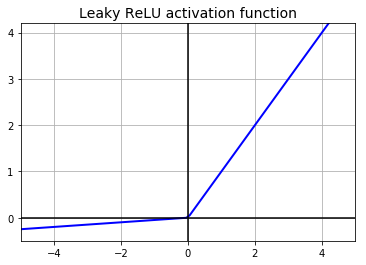

In [9]:
z = np.linspace(-5, 5, 100)
plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
plt.title("Leaky ReLU activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])
plt.show()

in TensorFlow

In [10]:
def leaky_relu(z, name=None):
    return tf.maximum(0.01 * z, z, name=name)

In [11]:
reset_graph()

n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

from datetime import datetime                                   
now = datetime.utcnow().strftime("%H%M%S")                      

root_logdir = "./logs"                                         
logdir = "{}/{}_{}_{}".format(root_logdir, "lrelu", "std", now)  

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y") 

with tf.name_scope("dnn"):
    he_init = tf.contrib.layers.variance_scaling_initializer()                    

    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                              activation=leaky_relu)                                         #-----new------#
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=leaky_relu)                                         #-----new------#
    logits = tf.layers.dense(hidden2, n_outputs,  name="outputs")  #-----new------#

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()

acc_summary = tf.summary.scalar('accuracy', accuracy)                   
loss_summary = tf.summary.scalar('loss', loss)                          
merged = tf.summary.merge_all()                                         

train_writer = tf.summary.FileWriter(logdir + '/train', tf.get_default_graph())  
test_writer = tf.summary.FileWriter(logdir + '/test')                        
 
n_epochs = 10
batch_size = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size, shuffle=False)
            sess.run(training_op, feed_dict={X: scaler.transform(X_batch), y: y_batch})
            
        acc_train, summary_train = sess.run([accuracy, merged], feed_dict={X: scaler.transform(X_batch), y: y_batch}) 
        acc_test, summary_test = sess.run([accuracy, merged], feed_dict={X: scaler.transform(X_test), y: y_test})     
        train_writer.add_summary(summary_train, epoch)       
        test_writer.add_summary(summary_test, epoch)         
        
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)



0 Train accuracy: 0.98 Test accuracy: 0.9223
1 Train accuracy: 1.0 Test accuracy: 0.9372
2 Train accuracy: 1.0 Test accuracy: 0.9467
3 Train accuracy: 1.0 Test accuracy: 0.9518
4 Train accuracy: 1.0 Test accuracy: 0.9558
5 Train accuracy: 1.0 Test accuracy: 0.9592
6 Train accuracy: 1.0 Test accuracy: 0.9613
7 Train accuracy: 1.0 Test accuracy: 0.9627
8 Train accuracy: 1.0 Test accuracy: 0.964
9 Train accuracy: 1.0 Test accuracy: 0.965


## ELU

In [12]:
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

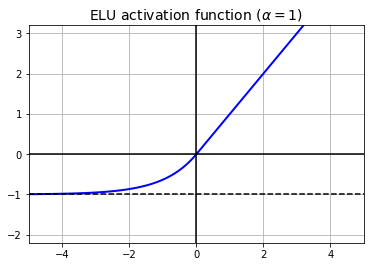

In [13]:
plt.plot(z, elu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

plt.show()

In [14]:
reset_graph()

n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

from datetime import datetime                                   
now = datetime.utcnow().strftime("%H%M%S")                      

root_logdir = "./logs"                                         
logdir = "{}/{}_{}_{}".format(root_logdir, "elu", "std", now)  

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y") 

with tf.name_scope("dnn"):
    he_init = tf.contrib.layers.variance_scaling_initializer()                    

    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                              activation=tf.nn.elu)                                         #-----new------#
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.elu)                                         #-----new------#
    logits = tf.layers.dense(hidden2, n_outputs,  name="outputs")  

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()

acc_summary = tf.summary.scalar('accuracy', accuracy)                   
loss_summary = tf.summary.scalar('loss', loss)                          
merged = tf.summary.merge_all()                                         

train_writer = tf.summary.FileWriter(logdir + '/train', tf.get_default_graph())  
test_writer = tf.summary.FileWriter(logdir + '/test')                        
 
n_epochs = 10
batch_size = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size, shuffle=False)
            sess.run(training_op, feed_dict={X: scaler.transform(X_batch), y: y_batch})
            
        acc_train, summary_train = sess.run([accuracy, merged], feed_dict={X: scaler.transform(X_batch), y: y_batch}) 
        acc_test, summary_test = sess.run([accuracy, merged], feed_dict={X: scaler.transform(X_test), y: y_test})     
        train_writer.add_summary(summary_train, epoch)       
        test_writer.add_summary(summary_test, epoch)         
        
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)



0 Train accuracy: 0.96 Test accuracy: 0.9235
1 Train accuracy: 0.98 Test accuracy: 0.9381
2 Train accuracy: 1.0 Test accuracy: 0.9462
3 Train accuracy: 1.0 Test accuracy: 0.9514
4 Train accuracy: 1.0 Test accuracy: 0.9541
5 Train accuracy: 1.0 Test accuracy: 0.9568
6 Train accuracy: 1.0 Test accuracy: 0.9602
7 Train accuracy: 1.0 Test accuracy: 0.9619
8 Train accuracy: 1.0 Test accuracy: 0.9626
9 Train accuracy: 1.0 Test accuracy: 0.9642


## SELU

In [15]:
def selu(z,
         scale=1.0507009873554804934193349852946,
         alpha=1.6732632423543772848170429916717):
    return scale * elu(z, alpha)

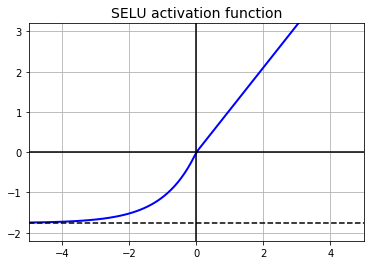

In [16]:
plt.plot(z, selu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1.758, -1.758], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"SELU activation function", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

plt.show()

in TensorFlow

In [17]:
def selu(z,
         scale=1.0507009873554804934193349852946,
         alpha=1.6732632423543772848170429916717):
    return scale * tf.where(z >= 0.0, z, alpha * tf.nn.elu(z))

In [18]:
reset_graph()

n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

from datetime import datetime                                   
now = datetime.utcnow().strftime("%H%M%S")                      

root_logdir = "./logs"                                         
logdir = "{}/{}_{}_{}".format(root_logdir, "selu", "std", now)  

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y") 

with tf.name_scope("dnn"):
    he_init = tf.contrib.layers.variance_scaling_initializer()                    

    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                              activation=selu)                                         #-----new------#
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=selu)                                         #-----new------#
    logits = tf.layers.dense(hidden2, n_outputs,  name="outputs")  

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()

acc_summary = tf.summary.scalar('accuracy', accuracy)                   
loss_summary = tf.summary.scalar('loss', loss)                          
merged = tf.summary.merge_all()                                         

train_writer = tf.summary.FileWriter(logdir + '/train', tf.get_default_graph())  
test_writer = tf.summary.FileWriter(logdir + '/test')                        
 
n_epochs = 10
batch_size = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size, shuffle=False)
            sess.run(training_op, feed_dict={X: scaler.transform(X_batch), y: y_batch})
            
        acc_train, summary_train = sess.run([accuracy, merged], feed_dict={X: scaler.transform(X_batch), y: y_batch}) 
        acc_test, summary_test = sess.run([accuracy, merged], feed_dict={X: scaler.transform(X_test), y: y_test})     
        train_writer.add_summary(summary_train, epoch)       
        test_writer.add_summary(summary_test, epoch)         
        
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)



0 Train accuracy: 0.96 Test accuracy: 0.9193
1 Train accuracy: 0.98 Test accuracy: 0.9339
2 Train accuracy: 1.0 Test accuracy: 0.9426
3 Train accuracy: 1.0 Test accuracy: 0.95
4 Train accuracy: 1.0 Test accuracy: 0.954
5 Train accuracy: 1.0 Test accuracy: 0.9563
6 Train accuracy: 1.0 Test accuracy: 0.9586
7 Train accuracy: 1.0 Test accuracy: 0.96
8 Train accuracy: 1.0 Test accuracy: 0.9614
9 Train accuracy: 1.0 Test accuracy: 0.963


# Batch Normalization

In [19]:
reset_graph()

n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

from datetime import datetime                                   
now = datetime.utcnow().strftime("%H%M%S")                      

root_logdir = "./logs"                                         
logdir = "{}/{}_{}_{}_{}".format(root_logdir, "elu", "std", "BN", now)  

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y") 

training = tf.placeholder_with_default(False, shape=(), name='training')        #-----new------#
batch_norm_momentum = 0.9                                   #-----new------#
from functools import partial                             #-----new------#

with tf.name_scope("dnn"):
    he_init = tf.contrib.layers.variance_scaling_initializer()                    
    #-----------------------------new-----------------------------------#
    my_batch_norm_layer = partial(                                
            tf.layers.batch_normalization,
            training=training,
            momentum=batch_norm_momentum)

    my_dense_layer = partial(
            tf.layers.dense,
            kernel_initializer=he_init)

    hidden1 = my_dense_layer(X, n_hidden1, name="hidden1")
    bn1 = tf.nn.elu(my_batch_norm_layer(hidden1))
    hidden2 = my_dense_layer(bn1, n_hidden2, name="hidden2")
    bn2 = tf.nn.elu(my_batch_norm_layer(hidden2))
    logits_before_bn = my_dense_layer(bn2, n_outputs, name="outputs")
    logits = my_batch_norm_layer(logits_before_bn)
    #-------------------------------------------------------------------#
    
#     hidden1 = tf.layers.dense(X, n_hidden1, kernel_initializer=he_init, name="hidden1")                                         
#     bn1 = tf.layers.batch_normalization(hidden1, training=training, momentum=batch_norm_momentum)
#     elu1 = tf.nn.elu(bn1)
    
#     hidden2 = tf.layers.dense(elu1, n_hidden2, kernel_initializer=he_init, name="hidden2")                                         
#     bn2 = tf.layers.batch_normalization(hidden2, training=training, momentum=batch_norm_momentum)
#     elu2 = tf.nn.elu(bn2)
    
#     logits_before_bn = tf.layers.dense(elu2, n_outputs, kernel_initializer=he_init, name="outputs")  
#     logits = tf.layers.batch_normalization(logits_before_bn, training=training, momentum=batch_norm_momentum)

    
    
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()

acc_summary = tf.summary.scalar('accuracy', accuracy)                   
loss_summary = tf.summary.scalar('loss', loss)                          
merged = tf.summary.merge_all()                                         

train_writer = tf.summary.FileWriter(logdir + '/train', tf.get_default_graph())  
test_writer = tf.summary.FileWriter(logdir + '/test')                        
 
n_epochs = 10
batch_size = 50

extra_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)            #-----new------#

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size, shuffle=False)
            sess.run([training_op, extra_update_ops], feed_dict={training: True, X: X_batch, y: y_batch}) #-----new------#
            
        acc_train, summary_train = sess.run([accuracy, merged], feed_dict={X: X_batch, y: y_batch}) 
        acc_test, summary_test = sess.run([accuracy, merged], feed_dict={X: X_test, y: y_test})     
        train_writer.add_summary(summary_train, epoch)       
        test_writer.add_summary(summary_test, epoch)         
        
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)


0 Train accuracy: 0.98 Test accuracy: 0.9092
1 Train accuracy: 1.0 Test accuracy: 0.9302
2 Train accuracy: 1.0 Test accuracy: 0.9433
3 Train accuracy: 1.0 Test accuracy: 0.9512
4 Train accuracy: 1.0 Test accuracy: 0.9573
5 Train accuracy: 1.0 Test accuracy: 0.9603
6 Train accuracy: 1.0 Test accuracy: 0.9626
7 Train accuracy: 1.0 Test accuracy: 0.9647
8 Train accuracy: 1.0 Test accuracy: 0.9656
9 Train accuracy: 1.0 Test accuracy: 0.9668


# Faster Optimizers

In [20]:
reset_graph()

n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

from datetime import datetime                                   
now = datetime.utcnow().strftime("%H%M%S")                      

root_logdir = "./logs"                                         
logdir = "{}/{}_{}_{}_{}_{}".format(root_logdir, "elu", "std", "BN", 'Adam', now)  

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y") 

training = tf.placeholder_with_default(False, shape=(), name='training')        
batch_norm_momentum = 0.9                                   
from functools import partial                            

with tf.name_scope("dnn"):
    he_init = tf.contrib.layers.variance_scaling_initializer()                    
    
    hidden1 = tf.layers.dense(X, n_hidden1, kernel_initializer=he_init, name="hidden1")                                         
    bn1 = tf.layers.batch_normalization(hidden1, training=training, momentum=batch_norm_momentum)
    elu1 = tf.nn.elu(bn1)
    
    hidden2 = tf.layers.dense(elu1, n_hidden2, kernel_initializer=he_init, name="hidden2")                                         
    bn2 = tf.layers.batch_normalization(hidden2, training=training, momentum=batch_norm_momentum)
    elu2 = tf.nn.elu(bn2)
    
    logits_before_bn = tf.layers.dense(elu2, n_outputs, kernel_initializer=he_init, name="outputs")  
    logits = tf.layers.batch_normalization(logits_before_bn, training=training, momentum=batch_norm_momentum)

    
    
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.AdamOptimizer(learning_rate)           #-----new------#
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()

acc_summary = tf.summary.scalar('accuracy', accuracy)                   
loss_summary = tf.summary.scalar('loss', loss)                          
merged = tf.summary.merge_all()                                         

train_writer = tf.summary.FileWriter(logdir + '/train', tf.get_default_graph())  
test_writer = tf.summary.FileWriter(logdir + '/test')                        
 
n_epochs = 10
batch_size = 50

extra_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)           

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size, shuffle=False)
            sess.run([training_op, extra_update_ops], feed_dict={training: True, X: X_batch, y: y_batch}) 
            
        acc_train, summary_train = sess.run([accuracy, merged], feed_dict={X: X_batch, y: y_batch}) 
        acc_test, summary_test = sess.run([accuracy, merged], feed_dict={X: X_test, y: y_test})     
        train_writer.add_summary(summary_train, epoch)       
        test_writer.add_summary(summary_test, epoch)         
        
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)


0 Train accuracy: 0.94 Test accuracy: 0.9512
1 Train accuracy: 0.96 Test accuracy: 0.9624
2 Train accuracy: 0.98 Test accuracy: 0.9694
3 Train accuracy: 1.0 Test accuracy: 0.972
4 Train accuracy: 0.98 Test accuracy: 0.9679
5 Train accuracy: 1.0 Test accuracy: 0.9693
6 Train accuracy: 1.0 Test accuracy: 0.9706
7 Train accuracy: 1.0 Test accuracy: 0.9754
8 Train accuracy: 1.0 Test accuracy: 0.9773
9 Train accuracy: 1.0 Test accuracy: 0.9769


# Dropout

In [21]:
reset_graph()

n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

from datetime import datetime                                   
now = datetime.utcnow().strftime("%H%M%S")                      

root_logdir = "./logs"                                         
logdir = "{}/{}_{}_{}_{}_{}".format(root_logdir, "elu", "std", "BN", 'Adam', now)  

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y") 

training = tf.placeholder_with_default(False, shape=(), name='training')        
batch_norm_momentum = 0.9                                   

dropout_rate = 0.5  # == 1 - keep_prob                            #-----new------#
X_drop = tf.layers.dropout(X, dropout_rate, training=training)      #-----new------#

with tf.name_scope("dnn"):
    he_init = tf.contrib.layers.variance_scaling_initializer()                    
    
    hidden1 = tf.layers.dense(X, n_hidden1, kernel_initializer=he_init, name="hidden1")                                         
    bn1 = tf.layers.batch_normalization(hidden1, training=training, momentum=batch_norm_momentum)
    elu1 = tf.nn.elu(bn1)
    hidden1_drop = tf.layers.dropout(elu1, dropout_rate, training=training)            #-----new------#
    
    hidden2 = tf.layers.dense(hidden1_drop, n_hidden2, kernel_initializer=he_init, name="hidden2")            #-----new------#                              
    bn2 = tf.layers.batch_normalization(hidden2, training=training, momentum=batch_norm_momentum)
    elu2 = tf.nn.elu(bn2)
    hidden2_drop = tf.layers.dropout(elu2, dropout_rate, training=training)            #-----new------#

    logits_before_bn = tf.layers.dense(hidden2_drop, n_outputs, kernel_initializer=he_init, name="outputs")   #-----new------#
    logits = tf.layers.batch_normalization(logits_before_bn, training=training, momentum=batch_norm_momentum)

    
    
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

learning_rate = 0.001

with tf.name_scope("train"):
    optimizer = tf.train.AdamOptimizer(learning_rate)           
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()

acc_summary = tf.summary.scalar('accuracy', accuracy)                   
loss_summary = tf.summary.scalar('loss', loss)                          
merged = tf.summary.merge_all()                                         

train_writer = tf.summary.FileWriter(logdir + '/train', tf.get_default_graph())  
test_writer = tf.summary.FileWriter(logdir + '/test')                        
 
n_epochs = 10
batch_size = 50

extra_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)           

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size, shuffle=False)
            sess.run([training_op, extra_update_ops], feed_dict={training: True, X: X_batch, y: y_batch}) 
            
        acc_train, summary_train = sess.run([accuracy, merged], feed_dict={X: X_batch, y: y_batch}) 
        acc_test, summary_test = sess.run([accuracy, merged], feed_dict={X: X_test, y: y_test})     
        train_writer.add_summary(summary_train, epoch)       
        test_writer.add_summary(summary_test, epoch)         
        
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)


0 Train accuracy: 0.98 Test accuracy: 0.9151
1 Train accuracy: 1.0 Test accuracy: 0.9368
2 Train accuracy: 1.0 Test accuracy: 0.9466
3 Train accuracy: 1.0 Test accuracy: 0.9529
4 Train accuracy: 1.0 Test accuracy: 0.9583
5 Train accuracy: 0.98 Test accuracy: 0.9618
6 Train accuracy: 0.98 Test accuracy: 0.9656
7 Train accuracy: 0.98 Test accuracy: 0.965
8 Train accuracy: 1.0 Test accuracy: 0.9683
9 Train accuracy: 1.0 Test accuracy: 0.9701
